# Attrition Project

### Load dataset

In [1]:
import pandas as pd
file = pd.ExcelFile('attrition.xlsx')
file.sheet_names


['INFO', 'Existing employees', 'Employees who have left', 'Presentation']

In [2]:
df1 = pd.read_excel(file, sheet_name = 'Existing employees')
df2 = pd.read_excel(file, sheet_name = 'Employees who have left')

In [3]:
df1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [4]:
df2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [5]:
df1['left'] = 0
df2['left'] = 1
df = df1.append(df2)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 11 columns):
Emp ID                   14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


In [8]:
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


cols= ["salary", "left"]
for col in cols:
    x = df[col].value_counts()
    x.plot.bar()
    plt.title(col)
    plt.show()
    


y = df.columns[1:8]
%matplotlib inline
for col in cols:
    sns.set()
    num = y
    plt.figure()
    sns.pairplot(df, size = 3.0, hue = col, vars = y)
    plt.show()
    


%matplotlib inline
for col in y:
    sns.set()
    sns.boxplot(x = "salary", y =col, data = df, hue = 'left')
    plt.show()

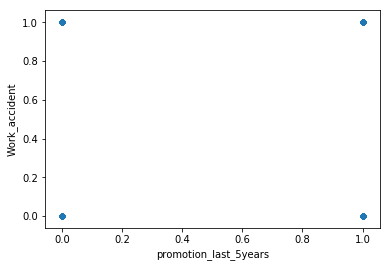

In [9]:
z = ['promotion_last_5years','Work_accident']
df.plot(kind = 'scatter', x = 'promotion_last_5years' ,y= 'Work_accident')

In [10]:
df.replace({'low': 0, 'medium': 1, 'high':2}, inplace = True)



In [11]:
dum = pd.get_dummies(df['dept'])

In [12]:
df = pd.concat((df,dum), axis = 1)
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,2001,0.58,0.74,4,215,3,0,0,sales,0,...,0,0,0,0,0,0,0,1,0,0
1,2002,0.82,0.67,2,202,3,0,0,sales,0,...,0,0,0,0,0,0,0,1,0,0
2,2003,0.45,0.69,5,193,3,0,0,sales,0,...,0,0,0,0,0,0,0,1,0,0
3,2004,0.78,0.82,5,247,3,0,0,sales,0,...,0,0,0,0,0,0,0,1,0,0
4,2005,0.49,0.60,3,214,2,0,0,sales,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
df.drop(['Emp ID','dept'], axis = 1, inplace = True)

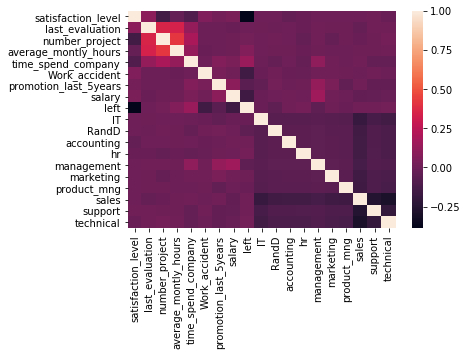

In [14]:
x = df.corr()
sns.heatmap(x)

In [15]:
y = df['left']
x = df.drop(['left'], axis = 1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 5)


In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
y_pred = model.transform(x_test)


AttributeError: 'RandomForestClassifier' object has no attribute 'transform'

In [ ]:
sklearn.metrics import accuracy_score,
accuracy_score(y_test, y_pred)